In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("J:/Data science/data/Wine.csv")

In [34]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [35]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [36]:
df['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [37]:
df.corr()['Customer_Segment'].sort_values()

Flavanoids             -0.847498
OD280                  -0.788230
Total_Phenols          -0.719163
Proline                -0.633717
Hue                    -0.617369
Proanthocyanins        -0.499130
Alcohol                -0.328222
Magnesium              -0.209179
Ash                    -0.049643
Color_Intensity         0.265668
Malic_Acid              0.437776
Nonflavanoid_Phenols    0.489109
Ash_Alcanity            0.517859
Customer_Segment        1.000000
Name: Customer_Segment, dtype: float64

In [38]:
df.shape

(178, 14)

In [39]:
x = df.iloc[: , 0:13]
x.head(1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065


In [40]:
y = df['Customer_Segment']
y.head(1)

0    1
Name: Customer_Segment, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
# from sklearn.decomposition import PCA

In [46]:
# pca = PCA(n_components=None)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

In [47]:
# explaned_var = pca.explained_variance_ratio_
# explaned_var

In [48]:
# pca = PCA(n_components=2)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

In [49]:
# explaned_var = pca.explained_variance_
# explaned_var

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train,y_train)
x_test = lda.transform(x_test)

In [66]:
x_train[:3]

array([[1.08922111, 2.0979426 ],
       [0.00453348, 2.4078767 ],
       [0.66278115, 1.41118933]])

In [65]:
x_test.shape

(54, 2)

In [67]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [57]:
x_train.shape

(124, 13)

In [72]:
from sklearn.metrics import accuracy_score
y_pred_lda = lda.predict(x_test)
acc = accuracy_score(y_test,y_pred_lda)
print(acc)
conf_lda = confusion_matrix(y_test,y_pred_lda)
conf_lda

0.9629629629629629


array([[19,  0,  0],
       [ 1, 20,  1],
       [ 0,  0, 13]], dtype=int64)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# log_model = LogisticRegression()
# log_model.fit(x_train,y_train)

In [ ]:
# y_pred = log_model.predict(x_test)

In [ ]:
# y_pred

In [71]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [ ]:
# conf = confusion_matrix(y_test,y_pred)
# conf

In [ ]:
plot_conf = plot_confusion_matrix(log_model,x_test,y_test)

In [ ]:
# from matplotlib.colors import ListedColormap

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(7,6),dpi=80)
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    
plt.title('LogisticRegression (PCA) (Testing set)',color = 'y')
plt.xlabel('pc1',color = 'y')
plt.ylabel('pc2',color = 'y')
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.legend()
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


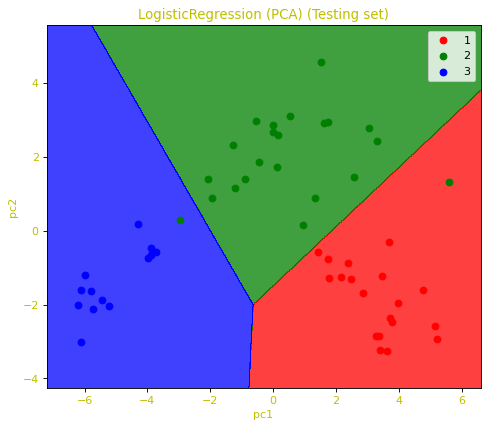

In [74]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(7,6),dpi=80)
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
    
plt.title('LogisticRegression (PCA) (Testing set)',color = 'y')
plt.xlabel('pc1',color = 'y')
plt.ylabel('pc2',color = 'y')
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.legend()
plt.show();